In [ ]:
#Import Libraries & Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [14]:
import datetime

In [ ]:
#Import the Data Set

In [25]:
df = pd.read_csv('nyc-east-river-bicycle-counts.csv')

In [15]:
df.head(4)

,Unnamed: 0,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,0,2016-04-01 00:00:00,2016-04-01 00:00:00,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497
1,1,2016-04-02 00:00:00,2016-04-02 00:00:00,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922
2,2,2016-04-03 00:00:00,2016-04-03 00:00:00,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759
3,3,2016-04-04 00:00:00,2016-04-04 00:00:00,44.1,33.1,0.47 (S),521.0,1067,1440.0,1307.0,4335


In [26]:
df = df.drop(columns=['Unnamed: 0'])

In [18]:
df.head(1)

,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,2016-04-01 00:00:00,2016-04-01 00:00:00,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497


In [19]:
df.dtypes

Date                    object
Day                     object
High Temp (°F)         float64
Low Temp (°F)          float64
Precipitation           object
Brooklyn Bridge        float64
Manhattan Bridge         int64
Williamsburg Bridge    float64
Queensboro Bridge      float64
Total                    int64
dtype: object

In [ ]:
filter(['A','B','D'], axis=1)

In [28]:
df = df.filter(['Date', 'High Temp (°F)', 'Low Temp (°F)', 'Precipitation', 'Williamsburg Bridge', 'Total'], axis = 1)

In [29]:
df.head(4)

,Date,High Temp (°F),Low Temp (°F),Precipitation,Williamsburg Bridge,Total
0,2016-04-01 00:00:00,78.1,66.0,0.01,4115.0,11497
1,2016-04-02 00:00:00,55.0,48.9,0.15,2565.0,6922
2,2016-04-03 00:00:00,39.9,34.0,0.09,1695.0,4759
3,2016-04-04 00:00:00,44.1,33.1,0.47 (S),1440.0,4335


In [30]:
df.dtypes

Date                    object
High Temp (°F)         float64
Low Temp (°F)          float64
Precipitation           object
Williamsburg Bridge    float64
Total                    int64
dtype: object

In [31]:
df['Date'] = pd.to_datetime(df['Date']) 

In [32]:
df.dtypes

Date                   datetime64[ns]
High Temp (°F)                float64
Low Temp (°F)                 float64
Precipitation                  object
Williamsburg Bridge           float64
Total                           int64
dtype: object

In [38]:
for ind, row in df.iterrows():
    df.loc[ind, 'Day %'] = ((row['Williamsburg Bridge'] / row['Total'])* 100)

In [39]:
df.head(1)

,Date,High Temp (°F),Low Temp (°F),Precipitation,Williamsburg Bridge,Total,Day %
0,2016-04-01,78.1,66.0,0.01,4115.0,11497,35.791946


In [40]:
df['Day %'] = df['Day %'].round(2)

In [41]:
df.head(4)

,Date,High Temp (°F),Low Temp (°F),Precipitation,Williamsburg Bridge,Total,Day %
0,2016-04-01,78.1,66.0,0.01,4115.0,11497,35.79
1,2016-04-02,55.0,48.9,0.15,2565.0,6922,37.06
2,2016-04-03,39.9,34.0,0.09,1695.0,4759,35.62
3,2016-04-04,44.1,33.1,0.47 (S),1440.0,4335,33.22


In [42]:
df.shape

(210, 7)

In [43]:
df.describe()

,High Temp (°F),Low Temp (°F),Williamsburg Bridge,Total,Day %
count,210.000000,210.000000,210.000000,210.000000,210.000000
mean,60.580000,46.413333,4862.466667,14534.500000,33.650667
std,11.183223,9.522796,1814.039499,5569.173496,1.272795
min,39.900000,26.100000,1440.000000,4335.000000,31.870000
25%,55.000000,44.100000,3282.000000,9596.000000,32.560000
50%,62.100000,46.900000,5194.000000,15292.500000,33.485000
75%,68.000000,50.000000,6030.000000,18315.000000,34.240000
max,81.000000,66.000000,7834.000000,23318.000000,37.060000


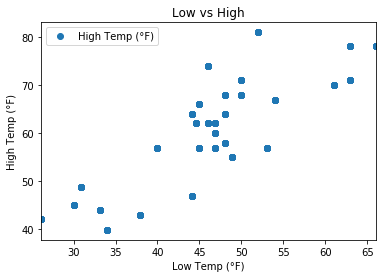

In [44]:
df.plot(x='Low Temp (°F)', y='High Temp (°F)', style='o')  
plt.title('Low vs High')  
plt.xlabel('Low Temp (°F)')  
plt.ylabel('High Temp (°F)')  
plt.show()

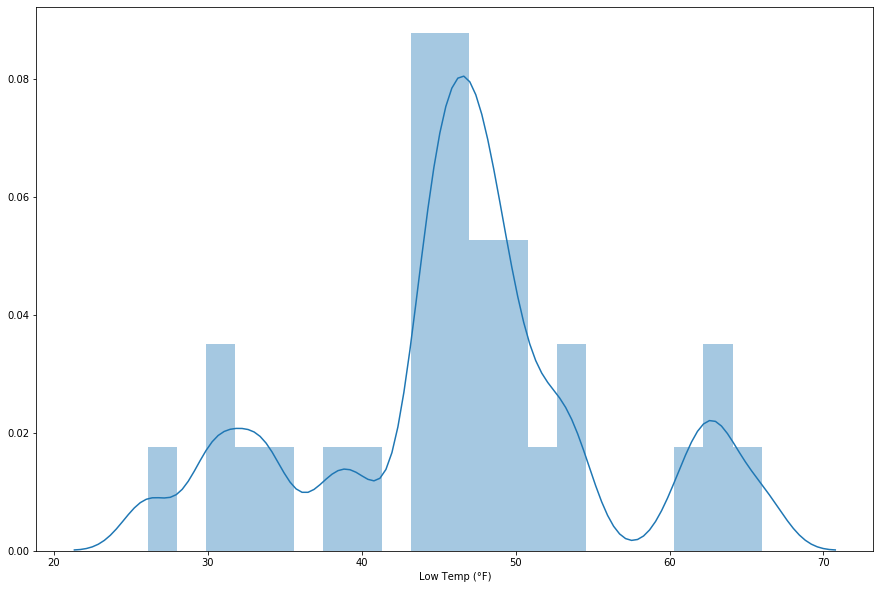

In [47]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df['Low Temp (°F)'])

In [48]:
df.head(2)

,Date,High Temp (°F),Low Temp (°F),Precipitation,Williamsburg Bridge,Total,Day %
0,2016-04-01,78.1,66.0,0.01,4115.0,11497,35.79
1,2016-04-02,55.0,48.9,0.15,2565.0,6922,37.06


In [49]:
df.to_csv('willybbridge.csv',index=False)